In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [ ]:
# Get dataset
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# Describe data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<ipython-input-20-8aa89a7ba6e8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['population'])


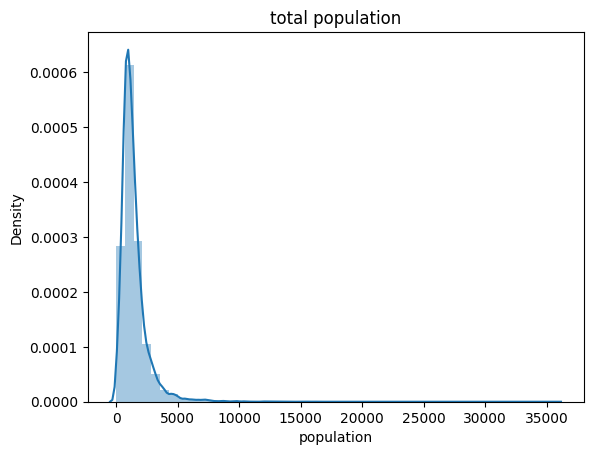

In [20]:
# Data distribution
plt.title('total population')
sns.distplot(df['population'])
plt.show()

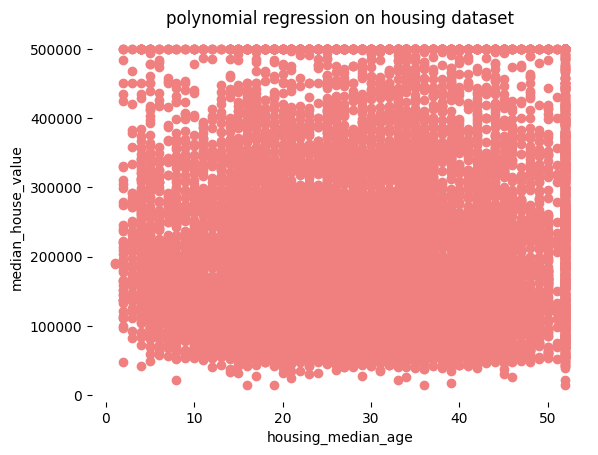

In [ ]:
# Relationship between House Age And House Price Of Unit Area
plt.scatter(df['housing_median_age'], df['median_house_value'], color = 'lightcoral')
plt.title('polynomial regression on housing dataset')
plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.box(False)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


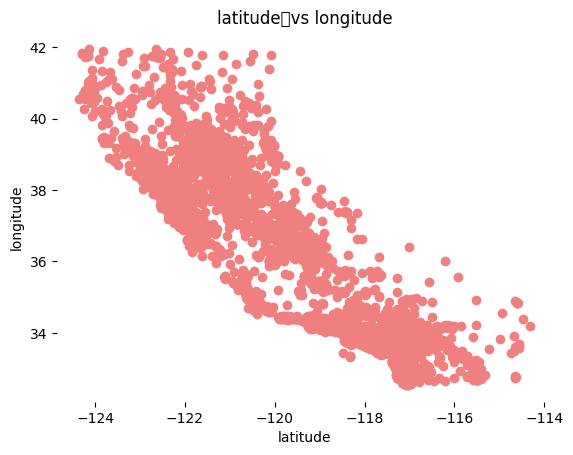

In [ ]:
# Relationship between  latitude	And longitude
plt.scatter(df['longitude'], df['latitude'], color = 'lightcoral')
plt.title('latitude	vs longitude')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.box(False)
plt.show()

In [ ]:
# Splitting variables
X = df.iloc[:, 2:3].values # independent
y = df.iloc[:, -1].values # dependent


In [ ]:
# Train linear regression model on whole dataset
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

LinearRegression()

In [ ]:
# Predict results
y_pred_lr = lr.predict(X) # Linear Regression
y_pred_poly = lr_2.predict(X_poly) # Polynomial Regression

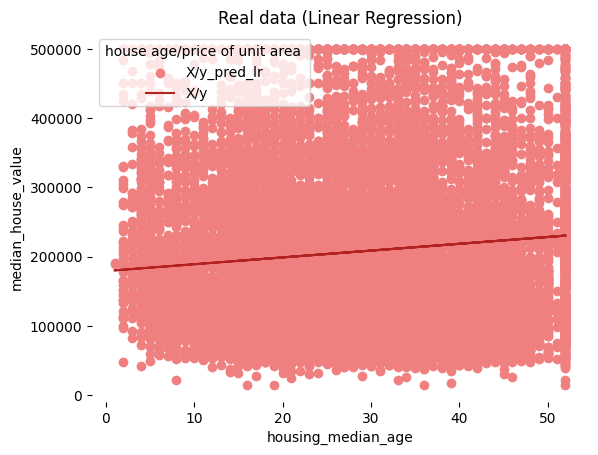

In [ ]:
# Visualize real data with linear regression
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.legend(['X/y_pred_lr', 'X/y'], title ='house age/price of unit area ', loc='best', facecolor='white')
plt.box(False)
plt.show()

<ipython-input-18-52208a0259fe>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


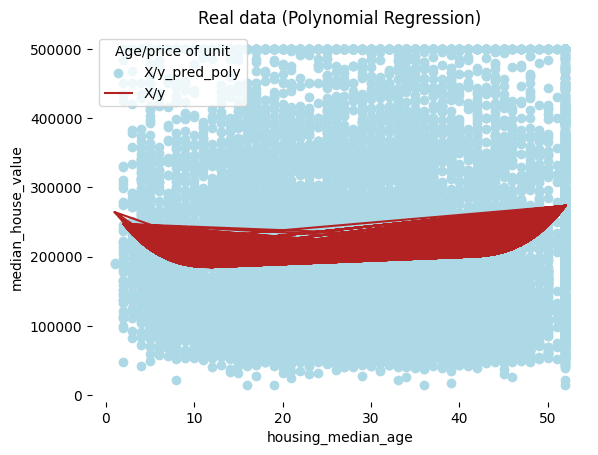

In [ ]:
# Visualize real data with polynomial regression
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'lightBlue')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Age/price of unit', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
# Predict a new result with linear regression
print(f'Linear Regression result : {lr.predict([[6.5]])}')
# Predict a new result with polynomial regression
print(f'Polynomial Regression result : {lr_2.predict(pr.fit_transform([[6.5]]))}')

Linear Regression result : [185570.92997203]
Polynomial Regression result : [199152.19159197]
